## Setup

In [2]:
dataset_version=2
project_name = "yolov5_results"
experiment_name = f"spriteNetv{dataset_version}"

In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="k0c4LE0r8CKhp8vYiax6")
project = rf.workspace("gmnsprites").project("spritenet")
version = project.version(dataset_version)
dataset = version.download("yolov5",f"roboflow/SpriteNet-{dataset_version}")

dataset_dir = dataset.location
print(f"\nDataset downloaded to {dataset_dir}")

loading Roboflow workspace...
loading Roboflow project...

Dataset downloaded to d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2


## Train

Autobatch determined optimal batch size for 320px images to be 132 for my GPU. I've used closest power of 2 of that number - 128.

In [20]:
!python yolov5/train.py --img 320 --batch 128 --epochs 250 --data {dataset_dir}/data.yaml --cfg models/custom_yolov5s.yaml --weights ''  --name {experiment_name} --cache ram --project {project_name}/train


train: weights='', cfg=models/custom_yolov5s.yaml, data=d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-1/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=250, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5_results/train, name=spriteNetv1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-365-g12b577c8 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

hyperparameters: lr0=0.01, lrf=0.01, mome

## Results

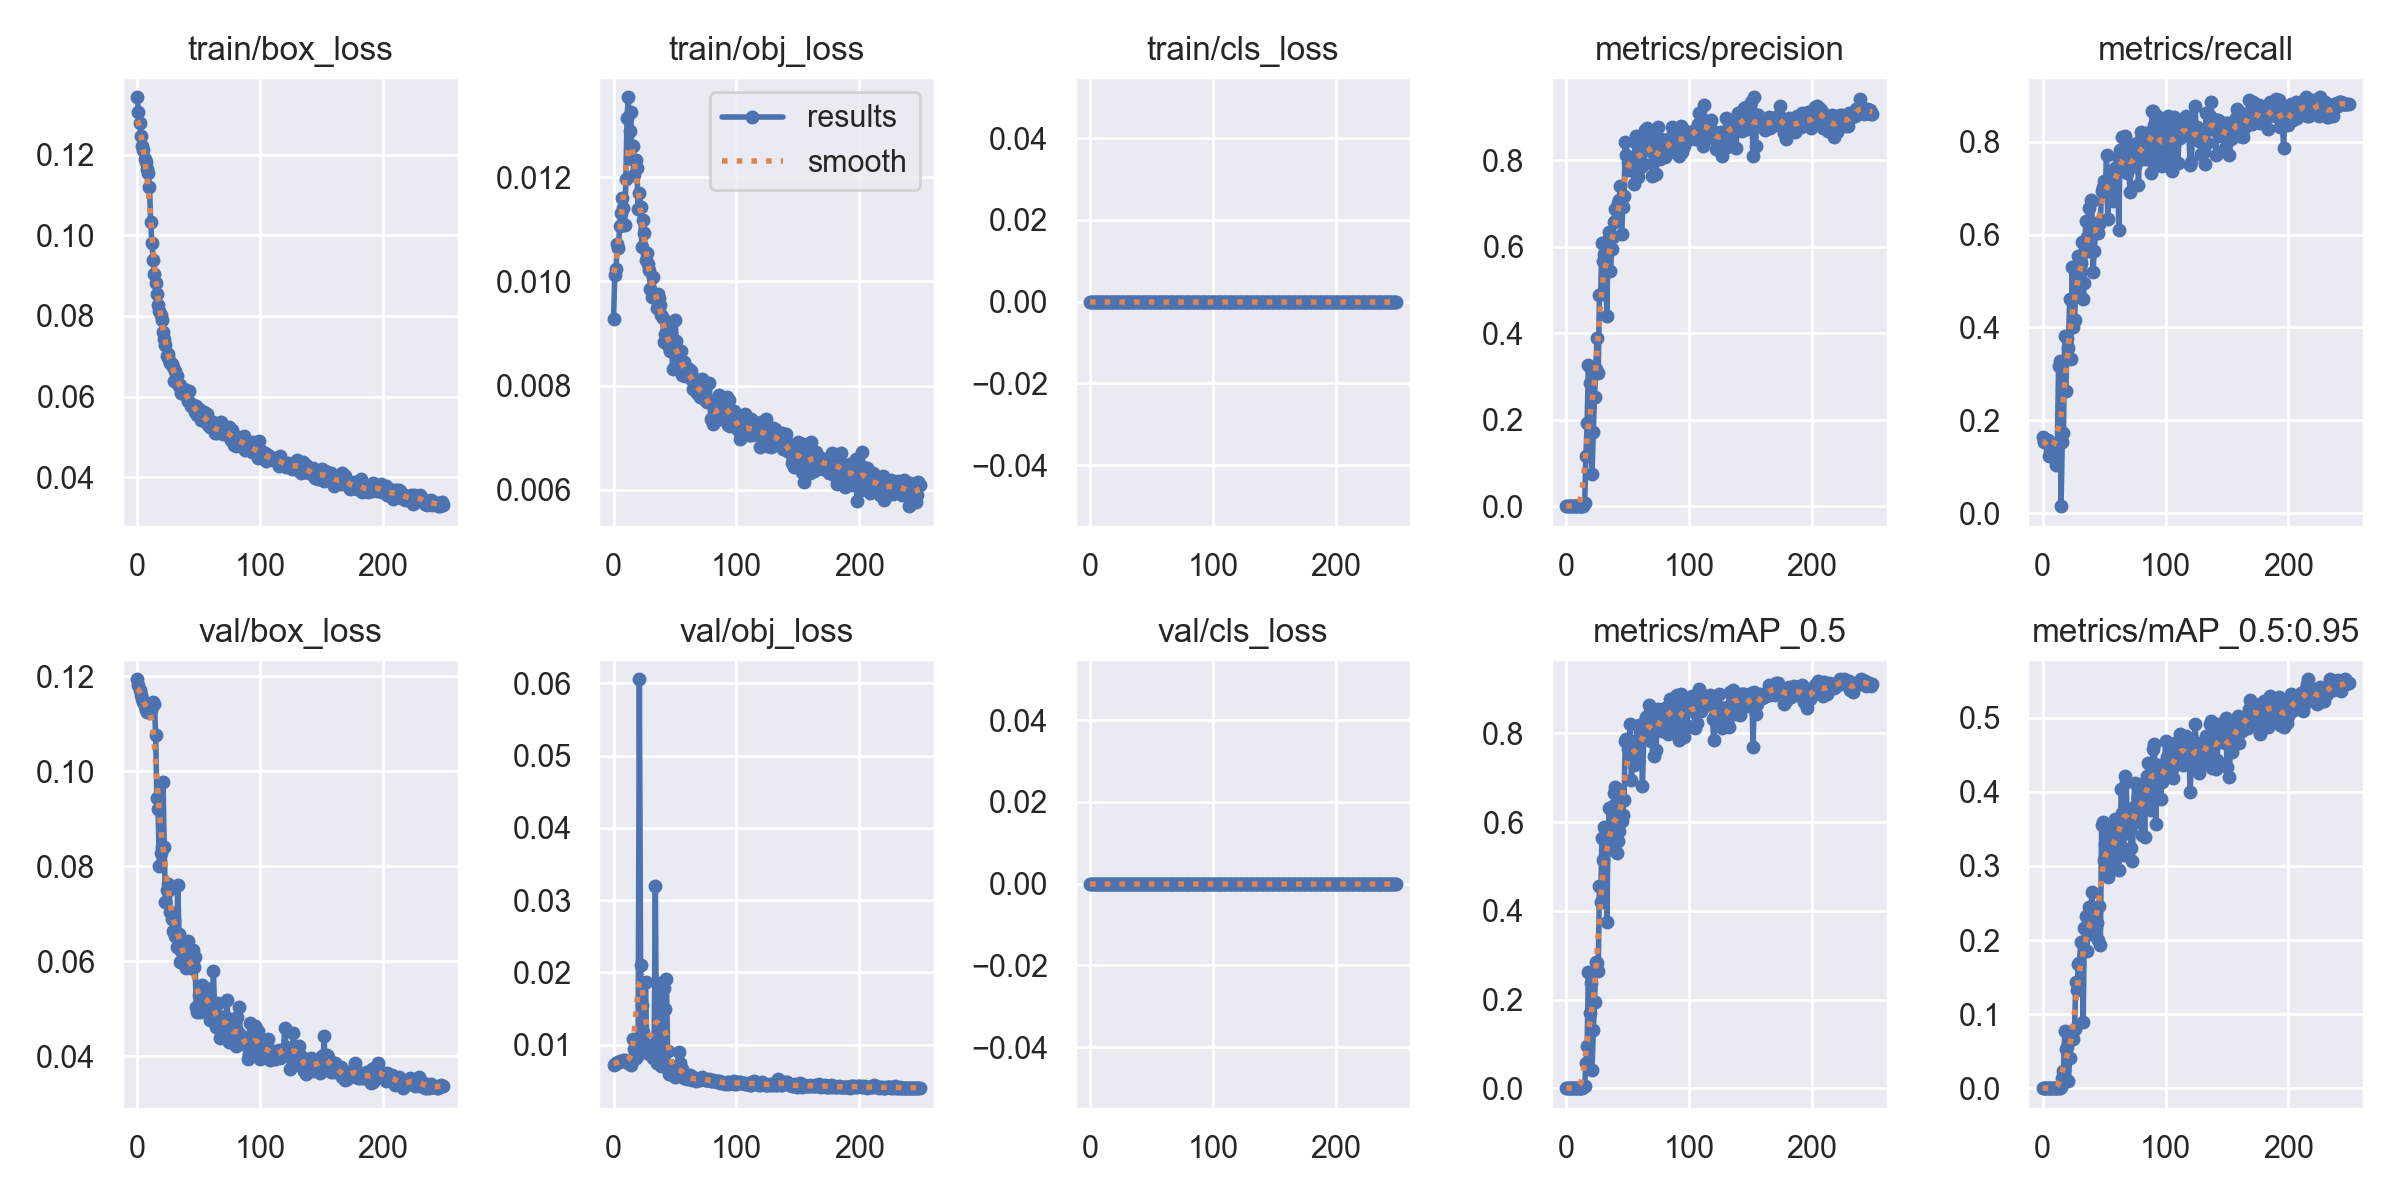

In [9]:
from IPython.display import Image
Image(filename=f"{project_name}/train/{experiment_name}/results.png", width=1000)

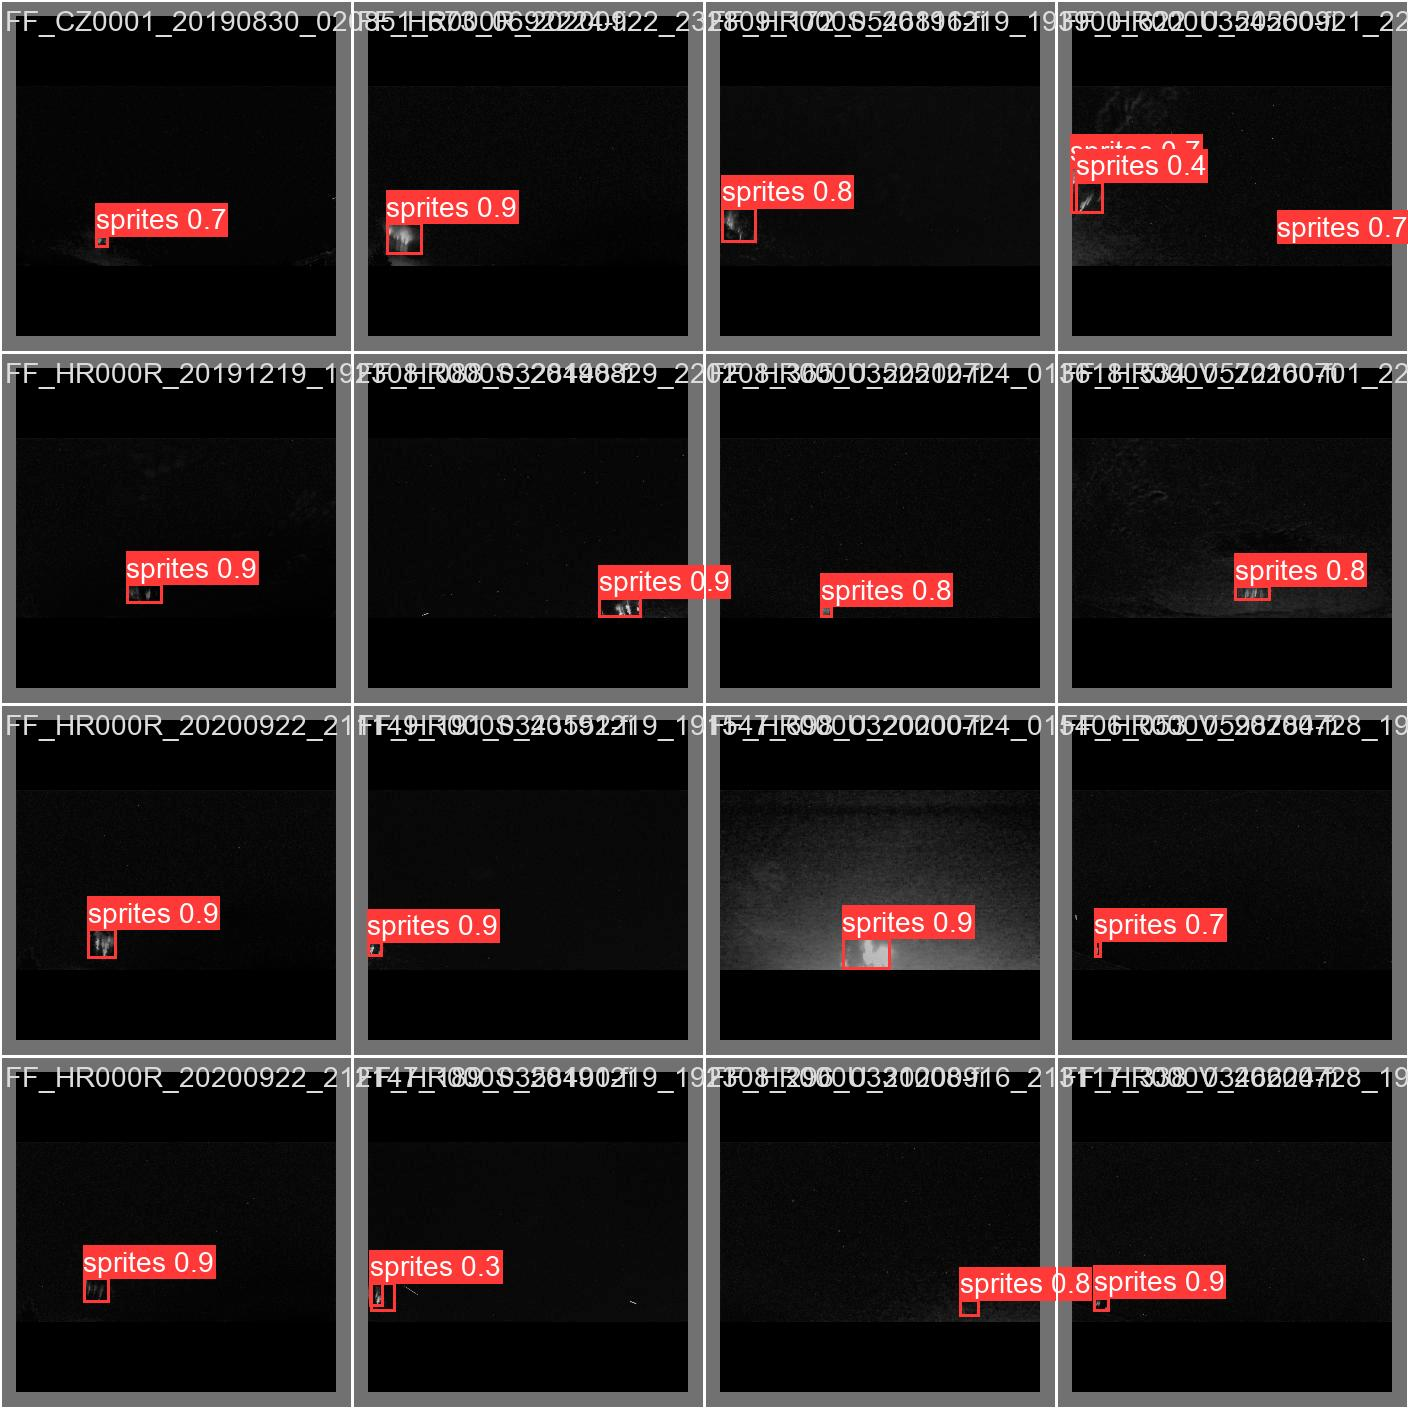

In [11]:
Image(filename=f"{project_name}/train/{experiment_name}/val_batch0_pred.jpg", width=900)

## Validation

In [13]:
!python yolov5/val.py --project {project_name}/val --name {experiment_name} --weights {project_name}/train/{experiment_name}/weights/best.pt --data {dataset_dir}/data.yaml --imgsz 320 --conf-thres 0.1 --iou-thres 0.1 --max-det 4 --batch-size 256

val: data=d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2/data.yaml, weights=['yolov5_results/train/spriteNetv2/weights/best.pt'], batch_size=256, imgsz=320, conf_thres=0.1, iou_thres=0.1, max_det=4, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_results/val, name=spriteNetv2, exist_ok=False, half=False, dnn=False
WARNING  confidence threshold 0.1 > 0.001 produces invalid results
YOLOv5  v7.0-365-g12b577c8 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning D:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2\valid\labels.cache... 204 images, 4 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<?, ?it/s]
val: Scanning D:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2\valid\labels.cache... 2

## Test

In [6]:
!python yolov5/detect.py --weights {project_name}/train/{experiment_name}/weights/best.pt --img 320 --conf 0.1 --source {dataset_dir}/test/images --name {experiment_name} --max-det 4 --iou-thres 0.1 --project {project_name}/detect

detect: weights=['yolov5_results/train/spriteNetv2/weights/best.pt'], source=d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2/test/images, data=yolov5\data\coco128.yaml, imgsz=[320, 320], conf_thres=0.1, iou_thres=0.1, max_det=4, device=, view_img=True, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5_results/detect, name=spriteNetv2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-365-g12b577c8 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/103 D:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow\SpriteNet-2\test\images\FF_CZ0001_20200520_014715_235_0403712-fits_png.rf.f858af58bf6ac68f5266dc17fe8c4af1.jpg: 320x320 1 sprites, 7.

In [14]:
import glob, os
from IPython.display import display, HTML

# Get the list of image files
image_files = glob.glob(f"{project_name}/detect/{experiment_name}2/*.jpg")[:12]  # assuming JPG

# Create HTML to display images in 2 columns
html = "<table><tr>"

for i, imageName in enumerate(image_files):
    if i % 3 == 0 and i != 0:
        html += "</tr><tr>"
    html += f"<td>{os.path.basename(imageName)}<br><img width='320' src='{imageName}'></td>"

html += "</tr></table>"

# Display the HTML
display(HTML(html))

FF_CZ0001_20200520_014715_235_0403712-fits_png.rf.f858af58bf6ac68f5266dc17fe8c4af1.jpg,FF_CZ0001_20200724_020007_254_0573952-fits_png.rf.1c9d9062bb9a044eef68417a5d03f4c1.jpg,FF_CZ0001_20200729_214156_999_0200192-fits_png.rf.c19c85c0d4456bc96eec5d0ae39a34a4.jpg
FF_CZ0001_20200804_213009_948_0160000-fits_png.rf.c8d8021562ec3941327689a07b16bbca.jpg,FF_HR0002_20200204_232546_026_0599552-fits_png.rf.113d22f41cb07e1251e9f53a4b67e12b.jpg,FF_HR0002_20200220_010543_684_0164096-fits_png.rf.dd09cfa0159812b7f9b7715435dc0b5e.jpg
FF_HR0002_20210316_213954_026_0122368-fits_png.rf.3eefa543a1178bc2f319946fbf9cadce.jpg,FF_HR0005_20200729_213051_379_0102400-fits_png.rf.373ede319cb8a02579c1e0f879967098.jpg,FF_HR0005_20200916_212016_850_0157440-fits_png.rf.fcc747b109da9adbc3d72c4210bb1d60.jpg
FF_HR0006_20190707_201620_682_0069120-fits_png.rf.39866485a1a137cb393fb383d8d96669.jpg,FF_HR0006_20190707_202807_773_0086784-fits_png.rf.32b38af161bf477a10ed61817ca3f85d.jpg,FF_HR0007_20190114_225725_404_0568576-fits_png.rf.169743cd493c2e0bcc752c2f8593ba18.jpg


## Export

`--half --device 0` is used to export models at FP16 half precision for smaller file sizes

In [13]:
!python yolov5/export.py --weights yolov5/runs/train/{experiment_name}/weights/best.pt --include tflite --imgsz 320,320

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 640, 640, 3)]           0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 320, 320, 32)            3488      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 160, 160, 64)            18496     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 160, 160, 64)            18624     ['tf_conv_1[0][0]']           
                                                                                              

d:\Documents\Astronomija\GMN\dev\SpriteNet\yolov5\export.py:59: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
export: data=D:\Documents\Astronomija\GMN\dev\SpriteNet\yolov5\data\coco128.yaml, weights=['yolov5/runs/train/spriteNetv1/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=0, half=True, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5  v7.0-363-gf44db010